# K Means Clustering

### The example here is an online retail store trying to segment customers to target an ad campaign aimed uniquely at each cluster. There is fair amount of data available (I am dealing with only a few in this example)

In [1]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
from sklearn.cluster import KMeans
style.use('fivethirtyeight')

In [8]:
# Read the online retail dataset. Has 5 columns most of them are self explanatory
dataset=pd.read_csv('Online Retail.csv')

dataset.head(10)

,CustomerID,Gender,Age,Annual Income (1000s),Purchase Power (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# We use just the two columns to (Annual Income in 1000s and
# Purchase power which is an internal score (1-100) generated by the store)
# to illustrate the example for clustering
X = dataset.iloc[:, [3, 4]].values

The idea is that we want a small "within cluster sum of squares" (WCSS), but that the WCSS tends to decrease toward 0 as we increase k (the WCSS is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low WCSS, and the elbow usually represents where we start to have diminishing returns by increasing k.

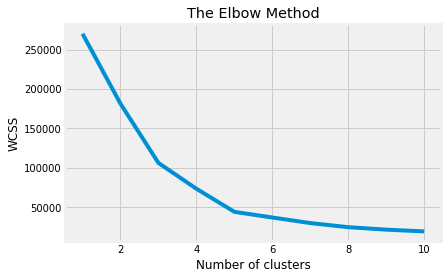

In [4]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 412)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the plot above it is evident that there is not much improvement beyond number of clusters = 5. 
So we have determined the optimal number of clusters for this dataset here 
(may not be truly global optima, but should be good for this dataset). We will use the kmeans
algorithm from the scikit learn library to see how we perform on this dataset with the clustering

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

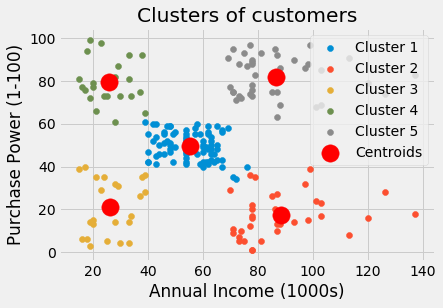

In [6]:
# Visualising the clusters
style.use('fivethirtyeight')

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (1000s)')
plt.ylabel('Purchase Power (1-100)')
plt.legend()
plt.show()